In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

import scipy.stats as ss
import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
#from mlxtend.plotting import plot_learning_curves
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from tensorflow.keras.layers import Dense, Input, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization

In [4]:
#df = pd.read_csv("BR_Filter.csv")
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BR_Filter.csv')

In [5]:
df.shape

(113024, 151)

In [6]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']
#col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA']

for i in range(len(col_names)):
    df_filter_BR = df.drop(df[df[col_names[i]]==1].index)
    df= df_filter_BR

df_filter_BR = df

In [7]:
df_filter_BR.shape

(83208, 151)

In [8]:
# dataframe without NA
df1 = df_filter_BR

In [9]:
# dataframe with NA
#df_NA =pd.read_csv('BR_Filter.csv')
df_NA = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/BR_Filter.csv")

In [10]:
df1_ok_BR = df1[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

df_ok_NA_BR = df_NA[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [11]:
df1_ok_BR.shape

(83208, 27)

In [12]:
df_ok_NA_BR.shape

(113024, 39)

# Training & Test

In [13]:
X = df1_ok_BR.drop(['B8.1'], axis=1)
Y = df1_ok_BR['B8.1']

X_NA = df_ok_NA_BR.drop(['B8.1'], axis=1)
Y_NA = df_ok_NA_BR['B8.1']

In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)


X_train_NA, X_test_NA, Y_train_NA, Y_test_NA = train_test_split(X_NA, Y_NA, test_size = 0.2, random_state=2)

In [15]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print()
print(X_train_NA.shape)
print(X_test_NA.shape)
print(Y_train_NA.shape)
print(Y_test_NA.shape)

(66566, 26)
(16642, 26)
(66566,)
(16642,)

(90419, 38)
(22605, 38)
(90419,)
(22605,)


## Decision Tree

### df1_ok

In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model=tree.DecisionTreeClassifier()

dtree_model = GridSearchCV(dtree_model, param_grid, cv=3)

dtree_model=dtree_model.fit(X_train, Y_train)
print(dtree_model.best_params_)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_leaf': 200}


Accuracy: 0.7470255978848696
              precision    recall  f1-score   support

           0       0.71      0.82      0.76      8070
           1       0.80      0.68      0.73      8572

    accuracy                           0.75     16642
   macro avg       0.75      0.75      0.75     16642
weighted avg       0.75      0.75      0.75     16642

[[6628 1442]
 [2768 5804]]


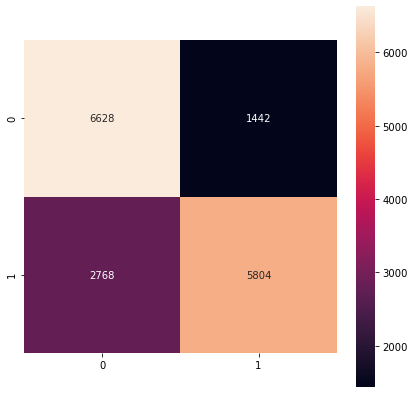

In [ ]:
my_model = dtree_model.best_estimator_
my_tree=my_model.fit(X_train, Y_train)

y_predicted = my_tree.predict(X_test)

print('Accuracy:',accuracy_score(Y_test, y_predicted))
print(classification_report(Y_test, y_predicted))
matrix = confusion_matrix(Y_test, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))

In [ ]:
my_tree.get_depth()
my_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 200,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

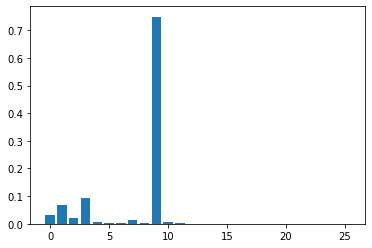

In [ ]:

from matplotlib import pyplot
importance=my_tree.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
'''
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data

col_names= ['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1']
dot_data = export_graphviz(my_tree,
                           feature_names=col_names)
graph = graph_from_dot_data(dot_data)
graph.write_png('BR_tree_df1_ok.png')
'''

In [ ]:
import shap

shap.initjs()

In [ ]:
explainer = shap.TreeExplainer(my_tree)
shap_values = explainer.shap_values(X_train)

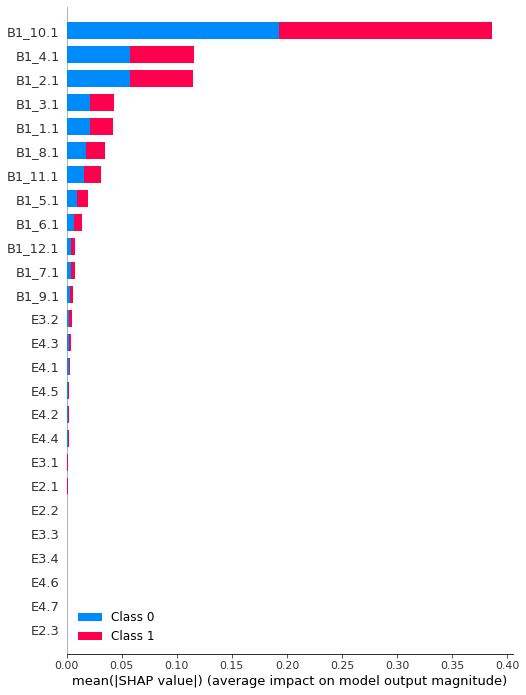

In [ ]:
shap.summary_plot(shap_values, features=X_train, feature_names=X_train.columns, max_display=len(X_train))

## Testing GERMANY

In [16]:
#df_DE = pd.read_csv("DE_Filter.csv")
df_DE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DE_Filter.csv')

In [17]:
df_DE.shape

(123055, 151)

In [18]:
# dataframe filter
df_filter_DE = df_DE

In [19]:
df_filter_DE.shape

(123055, 151)

In [20]:
# Delete NA
col_names = ['B1_1.NA','B1_2.NA','B1_3.NA','B1_4.NA','B1_5.NA','B1_6.NA','B1_7.NA','B1_8.NA','B1_9.NA','B1_10.NA','B1_11.NA','B1_12.NA','E3.NA','E4.NA','E2.NA']

for i in range(len(col_names)):
    df_filter_na_DE = df_filter_DE.drop(df_filter_DE[df_filter_DE[col_names[i]]==1].index)
    df_filter_DE= df_filter_na_DE

df_filter_na_DE = df_filter_DE

In [21]:
df_filter_na_DE.shape

(106817, 151)

In [22]:
# dataframe without NA
df_no_na_DE = df_filter_na_DE

In [23]:
# dataframe with NA

#df_NA_DE = pd.read_csv("DE_Filter.csv")
df_NA_DE = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/DE_Filter.csv')

In [24]:
df_no_na_DE.shape

(106817, 151)

In [25]:
df_NA_DE.shape

(123055, 151)

In [26]:
df1_ok_DE = df_no_na_DE[['B1_1.1','B1_2.1','B1_3.1','B1_4.1','B1_5.1','B1_6.1','B1_7.1','B1_8.1','B1_9.1','B1_10.1','B1_11.1','B1_12.1','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

df_ok_NA_DE = df_NA_DE[['B1_1.1','B1_1.2','B1_2.1','B1_2.2','B1_3.1','B1_3.2','B1_4.1','B1_4.2','B1_5.1','B1_5.2','B1_6.1','B1_6.2','B1_7.1','B1_7.2','B1_8.1','B1_8.2','B1_9.1','B1_9.2','B1_10.1','B1_10.2','B1_11.1','B1_11.2','B1_12.1','B1_12.2','B8.1','E3.1','E3.2','E3.3','E3.4','E4.1','E4.2','E4.3','E4.4','E4.5','E4.6','E4.7','E2.1','E2.2','E2.3']]

In [27]:
df1_ok_DE.shape

(106817, 27)

In [28]:
df_ok_NA_DE.shape

(123055, 39)

In [29]:
X_DE = df1_ok_DE.drop(['B8.1'], axis=1)
Y_DE = df1_ok_DE['B8.1']

X_NA_DE = df_ok_NA_DE.drop(['B8.1'], axis=1)
Y_NA_DE = df_ok_NA_DE['B8.1']

Accuracy: 0.8842131870395162
              precision    recall  f1-score   support

           0       0.98      0.89      0.94    101480
           1       0.26      0.70      0.38      5337

    accuracy                           0.88    106817
   macro avg       0.62      0.80      0.66    106817
weighted avg       0.95      0.88      0.91    106817

[[90716 10764]
 [ 1604  3733]]


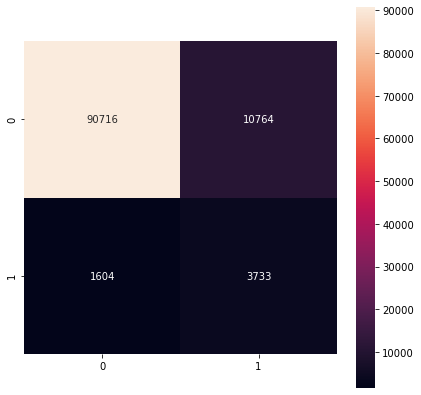

In [ ]:
y_predicted_DE = my_tree.predict(X_DE)

print('Accuracy:',accuracy_score(Y_DE, y_predicted_DE))
print(classification_report(Y_DE, y_predicted_DE))
matrix = confusion_matrix(Y_DE, y_predicted_DE)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test, y_predicted))

## df_ok_na


In [ ]:
max_depth = np.arange(1, 10)
min_samples_leaf = [50, 100, 200]

# GridSearchCV
param_grid = { 'criterion':['gini','entropy'],'max_depth': max_depth,'min_samples_leaf': min_samples_leaf}

In [ ]:
dtree_model_NA=tree.DecisionTreeClassifier()

dtree_model_NA = GridSearchCV(dtree_model_NA, param_grid, cv=3)

dtree_model_NA=dtree_model_NA.fit(X_train_NA, Y_train_NA)
print(dtree_model_NA.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 100}


Accuracy: 0.7388188453881884
              precision    recall  f1-score   support

           0       0.69      0.78      0.73     10330
           1       0.79      0.70      0.74     12275

    accuracy                           0.74     22605
   macro avg       0.74      0.74      0.74     22605
weighted avg       0.75      0.74      0.74     22605

[[8102 2228]
 [3676 8599]]


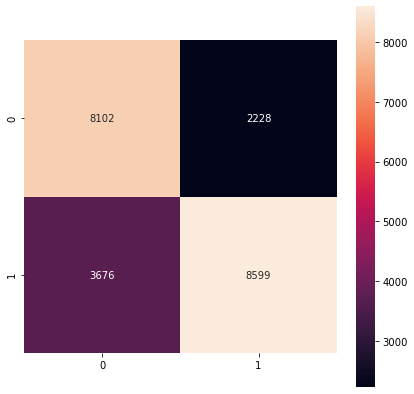

In [ ]:
my_model_NA = dtree_model_NA.best_estimator_
my_tree_NA=my_model_NA.fit(X_train_NA, Y_train_NA)

y_predicted = my_tree_NA.predict(X_test_NA)

print('Accuracy:',accuracy_score(Y_test_NA, y_predicted))
print(classification_report(Y_test_NA, y_predicted))
matrix = confusion_matrix(Y_test_NA, y_predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

In [ ]:
my_tree_NA.get_depth()
my_tree_NA.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

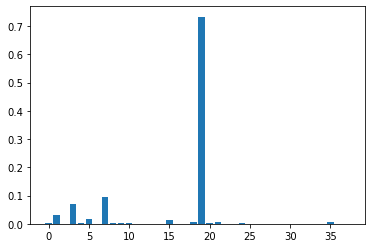

In [ ]:
from matplotlib import pyplot
importance=my_tree_NA.feature_importances_
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
explainer = shap.TreeExplainer(my_tree_NA)
shap_values = explainer.shap_values(X_train_NA)

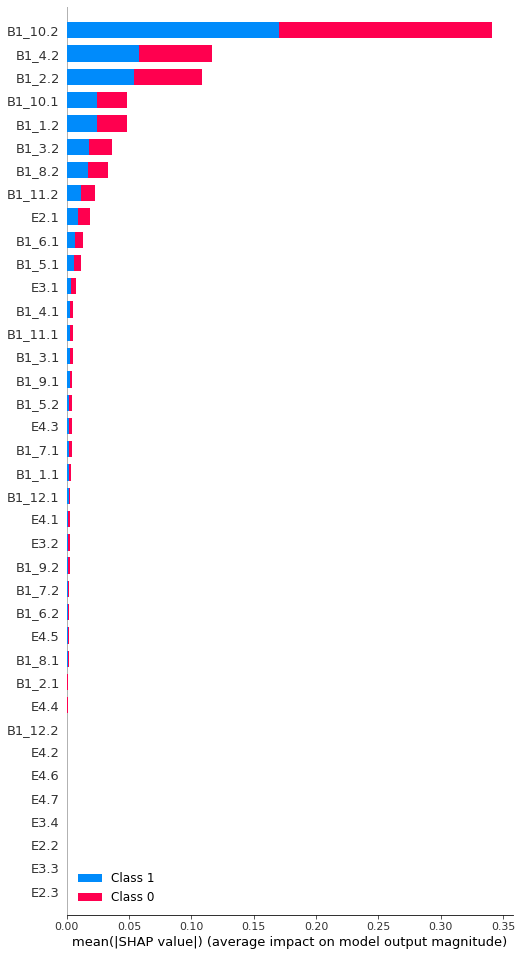

In [ ]:
shap.summary_plot(shap_values, features=X_train_NA, feature_names=X_train_NA.columns, max_display=len(X_train_NA))

## Testing GERMANY

Accuracy: 0.8586973304619886
              precision    recall  f1-score   support

           0       0.98      0.87      0.92    116449
           1       0.24      0.72      0.35      6606

    accuracy                           0.86    123055
   macro avg       0.61      0.80      0.64    123055
weighted avg       0.94      0.86      0.89    123055

[[100883  15566]
 [  1822   4784]]


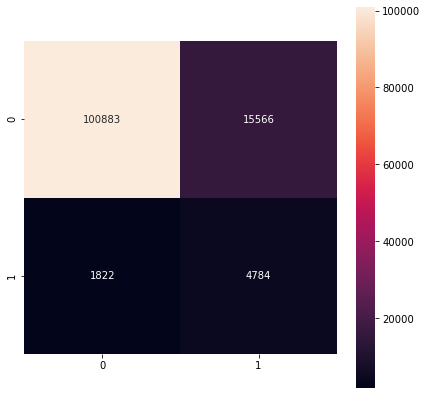

In [ ]:
y_predicted_DE = my_tree_NA.predict(X_NA_DE)

print('Accuracy:',accuracy_score(Y_NA_DE, y_predicted_DE))
print(classification_report(Y_NA_DE, y_predicted_DE))
matrix = confusion_matrix(Y_NA_DE, y_predicted_DE)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()
#print(confusion_matrix(Y_test_NA, y_predicted))

# Neural Network

### df1_ok

In [31]:
neg, pos = np.bincount(df1_ok_BR['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 83208
    Positive: 43148 (51.86% of total)



In [32]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.04
Weight for class 1: 0.96


In [33]:
def baseline_model2():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
  # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [34]:
model2 = baseline_model2()

history = model2.fit(
  X_train, Y_train, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
Epoch 1/50
118/118 [==============================] - 19s 8ms/step - loss: 0.7435 - binary_accuracy: 0.6377 - val_loss: 0.5975 - val_binary_accuracy: 0.6566
Epoch 2/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5903 - binary_accuracy: 0.7102 - val_loss: 0.5575 - val_binary_accuracy: 0.7316
Epoch 3/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5579 - binary_accuracy: 0.7261 - val_loss: 0.5343 - val_binary_accuracy: 0.7490
Epoch 4/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5469 - binary_accuracy: 0.7317 - val_loss: 0.5277 - val_binary_accuracy: 0.7482
Epoch 5/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5419 - binary_accuracy: 0.7368 - val_loss: 0.5251 - val_binary_accuracy: 0.7476
Epoch 6/50
118/118 [==============================] - 0s 3ms/step - loss: 0.5381 

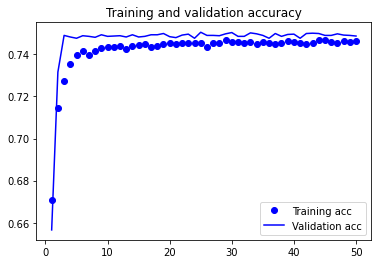

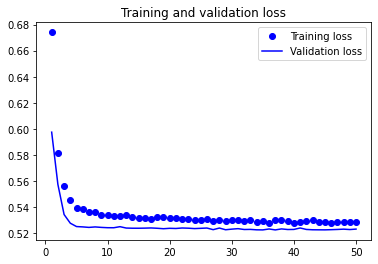

In [35]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

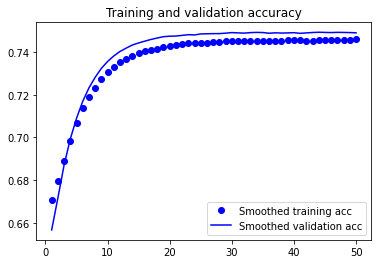

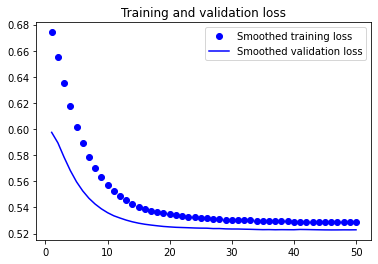

In [36]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [37]:
model2.evaluate(X_test, Y_test)

521/521 [==============================] - 1s 2ms/step - loss: 0.5258 - binary_accuracy: 0.7486


[0.5257759094238281, 0.7486479878425598]

Total accuracy: 74.8647999038577 %
              precision    recall  f1-score   support

           0       0.70      0.84      0.76      8070
           1       0.81      0.66      0.73      8572

    accuracy                           0.75     16642
   macro avg       0.76      0.75      0.75     16642
weighted avg       0.76      0.75      0.75     16642

[[6763 1307]
 [2876 5696]]


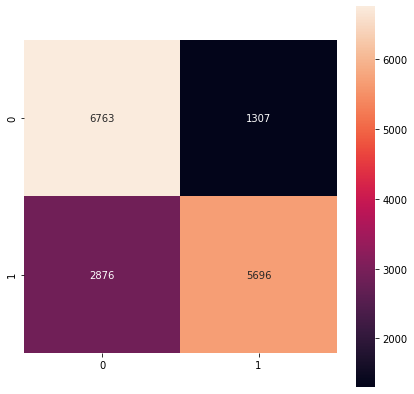

In [38]:
predicted = np.array([int(x[0] > 0.5) for x in model2.predict(X_test)])
print("Total accuracy:", np.sum(predicted==Y_test) / len(predicted) * 100., "%") 
print(classification_report(Y_test, predicted))
matrix = confusion_matrix(Y_test, predicted)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Testing GERMANY

Total accuracy: 90.96585749459356 %
              precision    recall  f1-score   support

           0       0.98      0.92      0.95    101480
           1       0.31      0.67      0.43      5337

    accuracy                           0.91    106817
   macro avg       0.65      0.80      0.69    106817
weighted avg       0.95      0.91      0.92    106817

[[93586  7894]
 [ 1756  3581]]


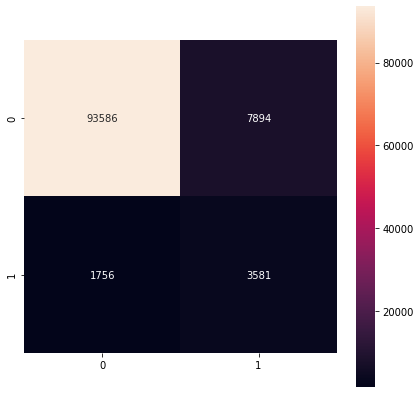

In [39]:
predicted_DE = np.array([int(x[0] > 0.5) for x in model2.predict(X_DE)])
print("Total accuracy:", np.sum(predicted_DE==Y_DE) / len(predicted_DE) * 100., "%") 
print(classification_report(Y_DE, predicted_DE))
matrix = confusion_matrix(Y_DE, predicted_DE)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

### df_ok_na

In [40]:
neg, pos = np.bincount(df_ok_NA_BR['B8.1'])
total = neg + pos
print('Examples:\n    Total: {}\n    Positive: {} ({:.2f}% of total)\n'.format(
    total, pos, 100 * pos / total))

Examples:
    Total: 113024
    Positive: 61176 (54.13% of total)



In [41]:
weight_for_0 = (1 / neg) * (total / 2.0)
weight_for_1 = (1 / pos) * (total / 2.0)

class_weight = {0: weight_for_0, 1: weight_for_1}

print('Weight for class 0: {:.2f}'.format(weight_for_0))
print('Weight for class 1: {:.2f}'.format(weight_for_1))

Weight for class 0: 1.09
Weight for class 1: 0.92


In [42]:
def baseline_model2_NA():
    model = Sequential()
    model.add(Dense(64, input_dim=X_train_NA.shape[1], activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))
    # Compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
    return model

In [43]:
model2_NA = baseline_model2_NA()

history = model2_NA.fit(
  X_train_NA, Y_train_NA, batch_size = 512,
  epochs=50, validation_split = 0.1,
  class_weight=class_weight)

Epoch 1/50
159/159 [==============================] - 2s 5ms/step - loss: 0.7293 - binary_accuracy: 0.6428 - val_loss: 0.5633 - val_binary_accuracy: 0.7341
Epoch 2/50
159/159 [==============================] - 1s 3ms/step - loss: 0.5642 - binary_accuracy: 0.7216 - val_loss: 0.5433 - val_binary_accuracy: 0.7348
Epoch 3/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5498 - binary_accuracy: 0.7328 - val_loss: 0.5400 - val_binary_accuracy: 0.7335
Epoch 4/50
159/159 [==============================] - 1s 3ms/step - loss: 0.5397 - binary_accuracy: 0.7407 - val_loss: 0.5353 - val_binary_accuracy: 0.7382
Epoch 5/50
159/159 [==============================] - 1s 3ms/step - loss: 0.5350 - binary_accuracy: 0.7396 - val_loss: 0.5343 - val_binary_accuracy: 0.7390
Epoch 6/50
159/159 [==============================] - 0s 3ms/step - loss: 0.5369 - binary_accuracy: 0.7400 - val_loss: 0.5359 - val_binary_accuracy: 0.7367
Epoch 7/50
159/159 [==============================] - 1s 3ms/ste

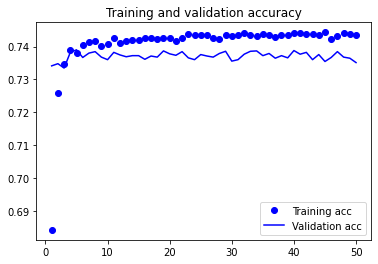

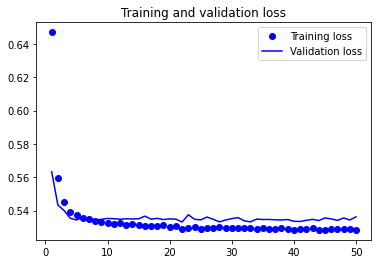

In [44]:
acc = history.history['binary_accuracy']
val_acc = history.history['val_binary_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc') 
plt.plot(epochs, val_acc, 'b', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss')
plt.legend()
plt.show()

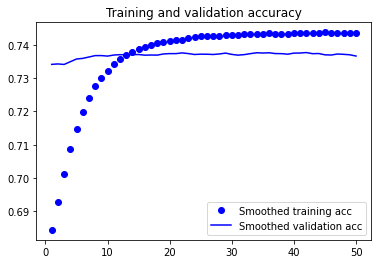

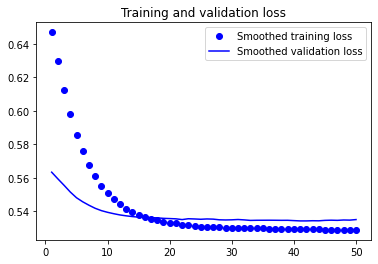

In [45]:
def smooth_curve(points, factor=0.8): 
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else: 
            smoothed_points.append(point)
    return smoothed_points
plt.plot(epochs,
         smooth_curve(acc), 'bo', label='Smoothed training acc')
plt.plot(epochs,
         smooth_curve(val_acc), 'b', label='Smoothed validation acc')
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs,
         smooth_curve(loss), 'bo', label='Smoothed training loss')
plt.plot(epochs,
         smooth_curve(val_loss), 'b', label='Smoothed validation loss')
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [46]:
model2_NA.evaluate(X_test_NA, Y_test_NA)

707/707 [==============================] - 1s 2ms/step - loss: 0.5335 - binary_accuracy: 0.7399


[0.5334661602973938, 0.7398805618286133]

Total accuracy: 74.27537514156285 %
              precision    recall  f1-score   support

           0       0.68      0.84      0.75     51848
           1       0.83      0.66      0.73     61176

    accuracy                           0.74    113024
   macro avg       0.75      0.75      0.74    113024
weighted avg       0.76      0.74      0.74    113024

[[43788  8060]
 [21015 40161]]


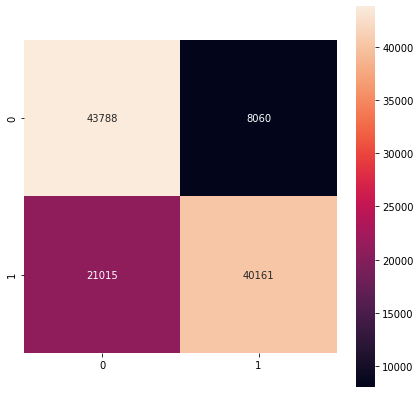

In [47]:
predicted_NA = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_NA)])
print("Total accuracy:", np.sum(predicted_NA==Y_NA) / len(predicted_NA) * 100., "%") 
print(classification_report(Y_NA, predicted_NA))
matrix = confusion_matrix(Y_NA, predicted_NA)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Testing GERMANY

Total accuracy: 92.22705294380562 %
              precision    recall  f1-score   support

           0       0.98      0.94      0.96    116449
           1       0.37      0.65      0.47      6606

    accuracy                           0.92    123055
   macro avg       0.68      0.80      0.72    123055
weighted avg       0.95      0.92      0.93    123055

[[109166   7283]
 [  2282   4324]]


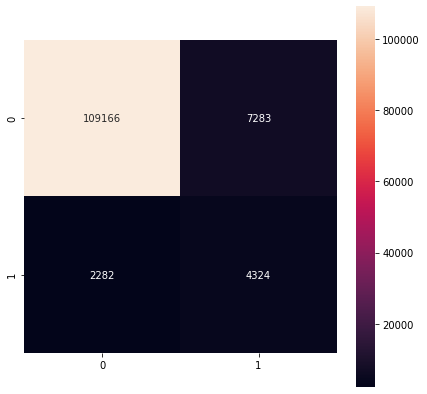

In [48]:
predicted_NA_DE = np.array([int(x[0] > 0.5) for x in model2_NA.predict(X_NA_DE)])
print("Total accuracy:", np.sum(predicted_NA_DE==Y_NA_DE) / len(predicted_NA_DE) * 100., "%") 
print(classification_report(Y_NA_DE, predicted_NA_DE))
matrix = confusion_matrix(Y_NA_DE, predicted_NA_DE)
print(matrix)
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

# Cli & Cli_who

## Cli

In [50]:
X_NA_DE = df_NA_DE['Cli']
Y_NA_DE = df_NA_DE['B8.1']

X_DE = df_no_na_DE['Cli']
Y_DE = df_no_na_DE['B8.1']


#X_BR=X_BR.values.reshape(-1,1)
#X_NA_BR=X_NA_BR.values.reshape(-1,1)

Accuracy: 0.9511500978308696
[[100732    748]
 [  4470    867]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97    101480
           1       0.54      0.16      0.25      5337

    accuracy                           0.95    106817
   macro avg       0.75      0.58      0.61    106817
weighted avg       0.94      0.95      0.94    106817



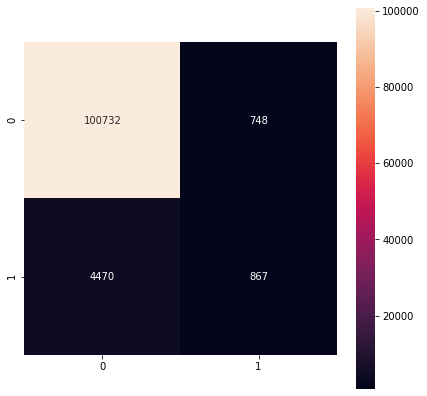

In [53]:
print('Accuracy:',accuracy_score(Y_DE,X_DE))

matrix = confusion_matrix(Y_DE, X_DE)
print(matrix)
print(classification_report(Y_DE, X_DE))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy: 0.9479988622973468
[[115541    908]
 [  5491   1115]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    116449
           1       0.55      0.17      0.26      6606

    accuracy                           0.95    123055
   macro avg       0.75      0.58      0.62    123055
weighted avg       0.93      0.95      0.93    123055



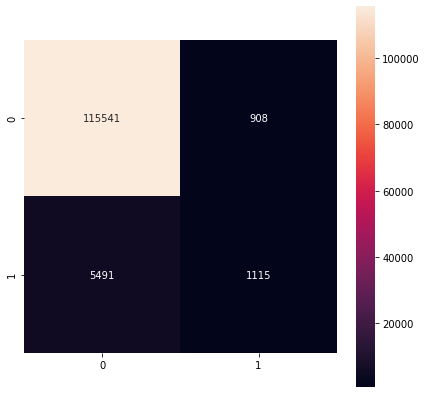

In [54]:
print('Accuracy:',accuracy_score(Y_NA_DE,X_NA_DE))

matrix = confusion_matrix(Y_NA_DE, X_NA_DE)
print(matrix)
print(classification_report(Y_NA_DE, X_NA_DE))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

## Cli_who

In [55]:
X_NA_DE = df_NA_DE['Cli_who']
Y_NA_DE = df_NA_DE['B8.1']

X_DE = df_no_na_DE['Cli_who']
Y_DE = df_no_na_DE['B8.1']


#X=X.values.reshape(-1,1)
#X_NA=X_NA.values.reshape(-1,1)

Accuracy: 0.9519832985386222
[[100907    573]
 [  4556    781]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98    101480
           1       0.58      0.15      0.23      5337

    accuracy                           0.95    106817
   macro avg       0.77      0.57      0.60    106817
weighted avg       0.94      0.95      0.94    106817



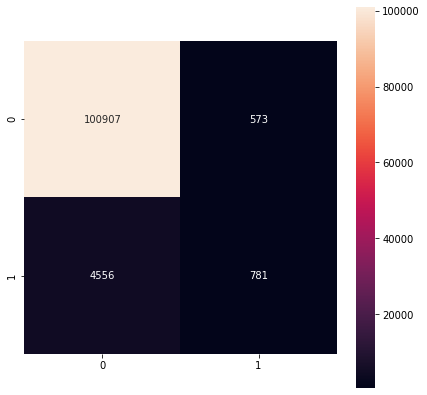

In [56]:
print('Accuracy:',accuracy_score(Y_DE,X_DE))

matrix = confusion_matrix(Y_DE, X_DE)
print(matrix)
print(classification_report(Y_DE, X_DE))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()

Accuracy: 0.9487221161269351
[[115753    696]
 [  5614    992]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97    116449
           1       0.59      0.15      0.24      6606

    accuracy                           0.95    123055
   macro avg       0.77      0.57      0.61    123055
weighted avg       0.93      0.95      0.93    123055



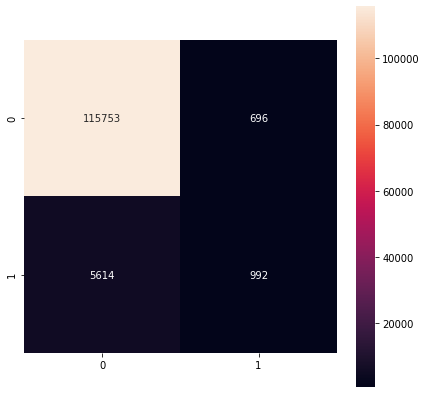

In [57]:
print('Accuracy:',accuracy_score(Y_NA_DE,X_NA_DE))

matrix = confusion_matrix(Y_NA_DE, X_NA_DE)
print(matrix)
print(classification_report(Y_NA_DE, X_NA_DE))
plt.figure(figsize=(7,7))
sns.heatmap(matrix,annot=True, square = True, fmt='g')
plt.show()